In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("browser_rankings_data.csv",header = 1)

In [11]:
from datetime import datetime
def days(row):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(row['Date of Last Description Change'], date_format)
    b = datetime.strptime(row['Date'], date_format)
    delta = a - b
    return delta.days

In [12]:
data['days'] = data.apply(days,axis = 1)

<AxesSubplot:xlabel='days', ylabel='Rank'>

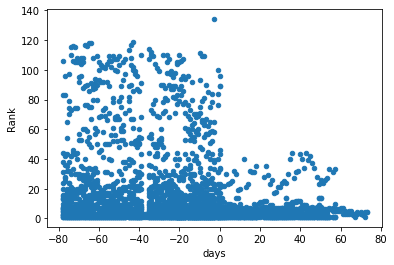

In [13]:
data.plot(kind = 'scatter',y = 'Rank', x = 'days')

In [14]:
from thefuzz import fuzz
from thefuzz import process
def semantic_sim_S_L(row):
    return fuzz.token_set_ratio(row['Short Description'],row['Long Description'])
data['semantic_sim_S_L'] = data.apply(semantic_sim_S_L,axis=1)

<AxesSubplot:xlabel='semantic_sim_S_L', ylabel='Rank'>

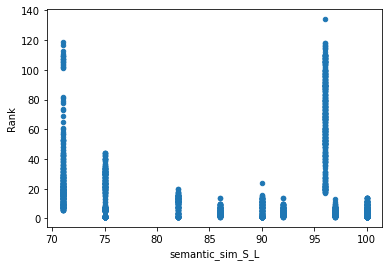

In [15]:
data.plot(kind = 'scatter',y = 'Rank', x = 'semantic_sim_S_L')

In [ ]:
"""
from sentence_transformers import SentenceTransformer, util
import numpy as np

model = SentenceTransformer('stsb-roberta-large')
def cos_sim(row):
    embedding1 = model.encode(row['Short Description'])
    embedding2 = model.encode(row['Long Description'])
    cosine_scores = util.pytorch_cos_sim(embedding1,embedding2)
    return cosine_scores.item()*100
data['cos_score'] = data.apply(cos_sim,axis=1)
#test_data = data.iloc[1:20]

#test_data.apply(cos_sim,axis=1)
"""

In [8]:
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,days,semantic_sim_S_L
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",2,90
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",2,82
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",73,86
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",2,92
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,53,100
